# Examen des prédictions du modèle original sur les séquences de test

In [1]:
import json
import numpy as np
import pandas as pd
import sklearn

In [2]:
import h5py
import cooler

In [3]:
import matplotlib.pyplot as plt

In [4]:
predpath = "/home/bureau/projects/def-bureau/bureau/ran-donnees/PredictNeuronHi-C/akita_pred_test/"
predfile = predpath + "preds.h5"

In [5]:
pred = h5py.File(predfile, 'r')
pred

<HDF5 file "preds.h5" (mode r)>

In [6]:
pred.keys()

<KeysViewHDF5 ['preds']>

In [7]:
pred['preds'].shape

(6667, 99681, 5)

In [8]:
targetfile = "/home/bureau/projects/def-bureau/bureau/distiller/iPSC/data/1m/seqs_cov/0.h5"

In [9]:
targets = h5py.File(targetfile, 'r')
targets

<HDF5 file "0.h5" (mode r)>

In [10]:
# Les données de tests sont les 6667 (pred['preds'].shape[0]) dernières
test_targets = targets['targets'][targets['targets'].shape[0]-pred['preds'].shape[0]:,]

In [11]:
test_targets.shape

(6667, 99681)

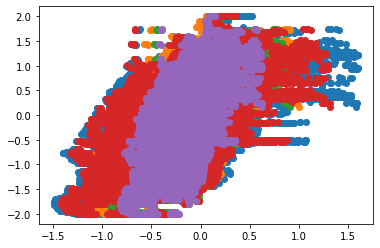

In [12]:
for i in range(5):
    plt.scatter(pred['preds'][0,:,i], test_targets[0,:])
plt.show()

## Calcul de l'erreur quadratique moyenne par lignée cellulaire utilisée pour la prédiction

In [12]:
from sklearn.metrics import mean_squared_error
mse_orig = []
for i in range(pred['preds'].shape[2]):
    mse_orig.append(mean_squared_error(test_targets,pred['preds'][:,:,i]))

In [13]:
display(mse_orig)

[0.5117, 0.463, 0.42, 0.4954, 0.4094]

## Calcul de l'erreur quadratique moyenne par lignée cellulaire pour chaque séquence de 1Mb

In [14]:
mse_orig_seq = np.zeros((pred['preds'].shape[0],pred['preds'].shape[2]))
for i in range(pred['preds'].shape[2]):
    for j in range(pred['preds'].shape[0]):
        mse_orig_seq[j,i] = mean_squared_error(test_targets[j,],pred['preds'][j,:,i])

In [15]:
hic_targets = pd.read_csv('/home/bureau/projects/def-bureau/basenji/manuscripts/akita/data/targets.txt',sep='\t')
hic_targets

,index,identifier,file,clip,description
0,0,HFF,../../data/coolers/Krietenstein2019/HFF_hg38_4...,2,HFF
1,1,H1hESC,../../data/coolers/Krietenstein2019/H1hESC_hg3...,2,H1hESC
2,2,GM12878,../../data/coolers/Rao2014/GM12878_inSitu_MboI...,2,GM12878
3,3,IMR90,../../data/coolers/Rao2014/IMR90_inSitu_MboI_a...,2,IMR90
4,4,HCT116,../../data/coolers/Rao2017/Unsynchronized_all....,2,HCT116


In [16]:
mse_orig_dat = pd.DataFrame(mse_orig_seq,columns=hic_targets['identifier'])
mse_orig_dat

identifier,HFF,H1hESC,GM12878,IMR90,HCT116
0,0.241089,0.232422,0.231445,0.227539,0.246338
1,0.300781,0.239624,0.239136,0.289062,0.250000
2,0.240967,0.236694,0.257568,0.234985,0.271973
3,0.270996,0.243530,0.235840,0.262939,0.251953
4,0.297607,0.258545,0.241699,0.289062,0.230835
...,...,...,...,...,...
6662,0.232666,0.217407,0.183594,0.223511,0.171753
6663,0.364746,0.291504,0.290527,0.352539,0.282227
6664,0.607422,0.463623,0.465088,0.598145,0.420166
6665,0.423584,0.338867,0.285889,0.405273,0.258545


In [21]:
#mse_var = map(lambda x : x.var(), list(mse_orig_dat.columns))
mse_orig_dat.var()

identifier
HFF        0.201316
H1hESC     0.204245
GM12878    0.200782
IMR90      0.200003
HCT116     0.214743
dtype: float64

In [19]:
mse_orig_dat.to_csv("mse_orig_dat.csv")

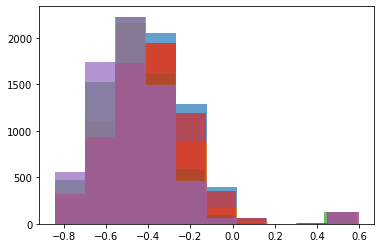

In [31]:
mse_orig_tr = mse_orig_seq.transpose()
for i in range(len(mse_orig_tr)) :
    plt.hist(np.log10(mse_orig_tr[i]),alpha=0.7)
plt.show()